In [2]:
from numpy import *
from qutip  import *
from matplotlib.pyplot import *
import numpy as np
import qutip as qt
from qutip import *
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
def H_sEIT(del_c, del_p, Omega_c, Omega_p, chi,kappa,Gamma):
    # Hamiltonian form is given by equation 7.3 from Novokov's thesis
    #del_c = w_c-w_q
    #del_p = w_p-w_ca
    term1 = (-del_c)*basis(4,1)*basis(4,1).dag()+\
    (chi-del_p)*basis(4,2)*basis(4,2).dag()+\
    (-chi-(del_c+del_p))*basis(4,3)*basis(4,3).dag()#energy
    term2 = (Omega_c/2)*basis(4,0)*basis(4,1).dag()+(Omega_c/2)*basis(4,1)*basis(4,0).dag()+\
    (Omega_p/2)*basis(4,0)*basis(4,2).dag()+(Omega_p/2)*basis(4,2)*basis(4,0).dag()+\
    (Omega_c/2)*basis(4,2)*basis(4,3).dag()+(Omega_c/2)*basis(4,3)*basis(4,2).dag()+\
    (Omega_p/2)*basis(4,1)*basis(4,3).dag()+(Omega_p/2)*basis(4,3)*basis(4,1).dag()
    
    H = term1 + term2  
    A_cav   = (basis(4,0)*basis(4,2).dag()+basis(4,1)*basis(4,3).dag())*np.sqrt(kappa)
    A_relax   = (basis(4,0)*basis(4,1).dag()+basis(4,2)*basis(4,3).dag())*np.sqrt(Gamma)
    #A_dephase = tensor( sigmaz(), qeye(N+1)) * np.sqrt(dephase)
    return H,[A_cav,A_relax]

In [27]:
def sEIT_Spectrum(Omega_c, Omega_p, 
                 chi, kappa, Gamma,
                 del_list,
                 del_control, control="Probe"):
    
    spec = np.zeros(len( del_list), dtype=np.float64)

    
    def spectrum(H, c_ops):
        rho_ss= steadystate(H, c_ops,solver='scipy')
        spec = rho_ss[0, 2].imag+rho_ss[1, 3].imag
        return spec
    
    if control=="Probe":
        for i, del_c in enumerate(del_list):
            H ,c_ops = H_sEIT(del_c,del_control, Omega_c, Omega_p, chi,kappa,Gamma)
            spec[i], pop_g0[i], pop_e0[i], pop_e1[i] = spectrum(H ,c_ops)
    
    else:
        for i, del_p in enumerate(del_list):
            H ,c_ops = H_sEIT(del_control,del_p, Omega_c, Omega_p, chi,kappa,Gamma)
            spec[i] = spectrum(H ,c_ops)
            
    return spec

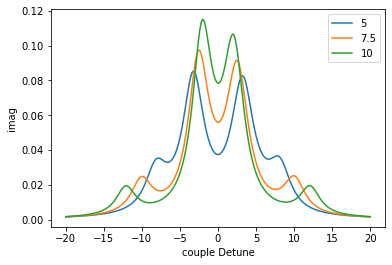

In [75]:
start=-20
end=20
point=201
del_control=0
chi = -5* (2*np.pi) #dispersive shift
Omega_p = 1* (2*np.pi)

kappa = 2 * (2*np.pi)
Gamma = 0.1 * (2*np.pi)

del_list = 2*pi*np.linspace(start, end, point)
sweep_range=1
resolution=11

#detune = 2*pi*linspace(-sweep_range,sweep_range,resolution)
z = np.zeros((resolution,point))
detune=[5,7.5,10]
for i ,Omega_c in enumerate(detune):
    z[i]= sEIT_Spectrum( Omega_c* (2*np.pi), Omega_p, chi,kappa,Gamma,del_list,del_control,control="Couple")
    plt.plot(del_list/(2*pi), z[i],label=Omega_c)
    plt.xlabel("couple Detune")
    plt.ylabel("imag")
plt.legend()

In [69]:
start=-20
end=20
point=201
del_control=0
chi = 5* (2*np.pi) #dispersive shift
Omega_p = 0.1* (2*np.pi)
Omega_c = 0*(2*np.pi)
kappa = 2 * (2*np.pi)
Gamma = 0.1 * (2*np.pi)

del_list = 2*pi*np.linspace(start, end, point)
sweep_range=1
resolution=11

#detune = 2*pi*linspace(-sweep_range,sweep_range,resolution)
z = np.zeros((resolution,point))

z= sEIT_Spectrum( Omega_c, Omega_p, chi,kappa,Gamma,del_list,del_control,control="Couple")


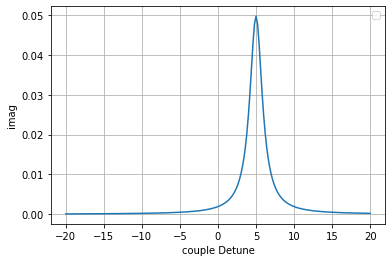

In [70]:
plt.plot(del_list/(2*pi), z)
plt.xlabel("couple Detune")
plt.ylabel("imag")
plt.legend()
plt.grid()